Coefficient: [ 0.          5.76310692 -0.07250989]
Intercept: 25.83
Equation of the curve: y = 25.83 + 5.76x^1 + -0.07x^2
Predicted salaries: 31.53, 37.07, 42.47, 47.73, 52.84, 57.80, 62.62, 67.30, 71.83, 76.21
Mean Squared Error: 11.47
Mean Absolute Error: 2.98
R-squared: 0.95
Root Mean Square Error: 3.39


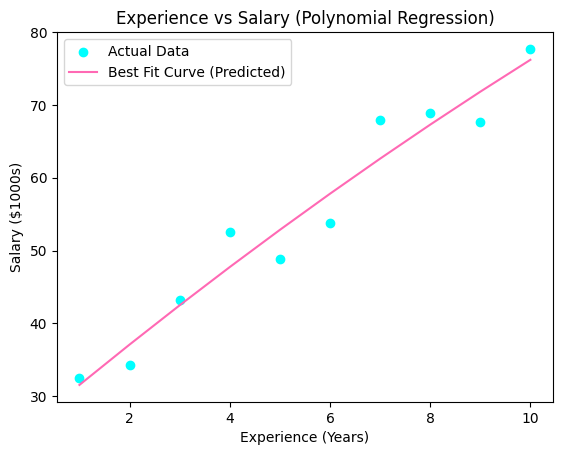

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

# Step 4: Create and train the model
model = LinearRegression()  # Initialize model
model.fit(X_poly, Y)  # Fit model with polynomial features

# Step 5: Calculate Coefficient and Intercept
coefficient = model.coef_
intercept = model.intercept_
print(f"Coefficient: {coefficient}")  # Slope of line
print(f"Intercept: {intercept:.2f}")  # Intercept

# Step 6: Display equation of the polynomial line
equation_terms = " + ".join(f"{coefficient[i]:.2f}x^{i}" for i in range(1, len(coefficient)))
print(f"Equation of the curve: y = {intercept:.2f} + {equation_terms}")

# Step 7: Predict values using the model
y_pred = model.predict(X_poly)  # Predict salaries for given experience
print(f"Predicted salaries: {', '.join(f'{val:.2f}' for val in y_pred)}")

# Calculate error metrics
mse = mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)
r2 = r2_score(Y, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")

# Step 8: Visualization
plt.scatter(X, Y, label='Actual Data', color='cyan')
plt.plot(X, y_pred, label='Best Fit Curve (Predicted)', color='hotpink')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($1000s)')
plt.title('Experience vs Salary (Polynomial Regression)')
plt.legend()
plt.show()

# Step 9: Feature prediction based on user input
while True:
    try:
        exp = float(input("\nEnter the experience in years (press -1 to exit): "))
        if exp == -1:
            break
        exp_poly = poly.transform([[exp]])  # Transform input for polynomial features
        predicted_salary = model.predict(exp_poly)
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary[0]:.2f}K")
    except ValueError:
        print("Invalid input. Please enter a valid number.")


In [ ]:
data = {
    'Size': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200],
    'Bedrooms': [3, 3, 3, 4, 4, 4, 5, 5],
    'Age': [10, 15, 10, 20, 30, 15, 20, 25],
    'Price': [300000, 320000, 340000, 360000, 400000, 370000, 420000, 430000]
}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame from the provided data
data = {
    'Size': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200],
    'Bedrooms': [3, 3, 3, 4, 4, 4, 5, 5],
    'Age': [10, 15, 10, 20, 30, 15, 20, 25],
    'Price': [300000, 320000, 340000, 360000, 400000, 370000, 420000, 430000]
}

df = pd.DataFrame(data)

# Define the independent variables (features) and the dependent variable (target)
X = df[['Size', 'Bedrooms', 'Age']]  # Independent variables
y = df['Price']  # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')



Mean Squared Error: 299314729.3077611
R-squared: 0.5210964331075822
Coefficients: [  182.01284797 -6252.67665953  1391.86295503]
Intercept: 33576.01713061787
